# Detecting breast cancer using a KNN model

In this project, we will use a k-nearest neighbors clustering algorithm to detect breast cancer. 

In [79]:
#import the libraries, classes and functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [80]:
# import our dataset using the UCI repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header = None)
df.columns = ['ID',
              'lump_thickness',
              'uniform_cell_size',
              'uniform_cell_shape',
              'marginal_adhesion',
              'single_epithelial_size',
              'bare_nuclei',
              'bland_chromatin',
              'normal_nucleoli',
              'mitoses',
              'class']

The dataset has 11 columns. These factors are used to determine if a cell is cancerous.

In [81]:
print df.loc[1] # take a look at the 2nd row of the data

ID                        1002945
lump_thickness                  5
uniform_cell_size               4
uniform_cell_shape              4
marginal_adhesion               5
single_epithelial_size          7
bare_nuclei                    10
bland_chromatin                 3
normal_nucleoli                 2
mitoses                         1
class                           2
Name: 1, dtype: object


In [82]:
print df.describe()

                 ID  lump_thickness  uniform_cell_size  uniform_cell_shape  \
count  6.990000e+02      699.000000         699.000000          699.000000   
mean   1.071704e+06        4.417740           3.134478            3.207439   
std    6.170957e+05        2.815741           3.051459            2.971913   
min    6.163400e+04        1.000000           1.000000            1.000000   
25%    8.706885e+05        2.000000           1.000000            1.000000   
50%    1.171710e+06        4.000000           1.000000            1.000000   
75%    1.238298e+06        6.000000           5.000000            5.000000   
max    1.345435e+07       10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000

For the class column, the values are either 2 or 4. Benign cases have a value of 2, while cancerous cases have a value of 4.

In [83]:
#explore the data
print df.head(50)

         ID  lump_thickness  uniform_cell_size  uniform_cell_shape  \
0   1000025               5                  1                   1   
1   1002945               5                  4                   4   
2   1015425               3                  1                   1   
3   1016277               6                  8                   8   
4   1017023               4                  1                   1   
5   1017122               8                 10                  10   
6   1018099               1                  1                   1   
7   1018561               2                  1                   2   
8   1033078               2                  1                   1   
9   1033078               4                  2                   1   
10  1035283               1                  1                   1   
11  1036172               2                  1                   1   
12  1041801               5                  3                   3   
13  1043999         

We can see that there is some missing data, so we will ignore that data.

In [84]:
# replace a question mark with -99999 and make Python ignore it
df.replace('?',-99999, inplace = True)

# drop ID column since it's useless in this case and we are left with 10 columns
data = df.drop(['ID'], 1)

For training, our dataset is split into x and y. The class column will be contained in y dataset, while the remaining will be contained in x dataset. Then we split our data into x_train, x_test, y_train, and y_test using the train_test_split function. We want to train 80% of the data and keep 20% for testing, so we set the test size to 0.2.

In [72]:
# create new datasets
x = np.array(data.drop(['class'], 1))
y = np.array(data['class'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [87]:
# add seed and scoring
seed = 8
scoring = 'accuracy'

With a KNN model, the data points are grouped into two groups: cancerous and non-cancerous

In [91]:
#create a KNN model

KNN = KNeighborsClassifier(n_neighbors=5)
kf= model_selection.KFold(n_splits = 10, random_state = seed)
cv_score_results = model_selection.cross_val_score(KNN, x_train, y_train, cv=kf, scoring=scoring)

print cv_score_results.mean()
print cv_score_results.std()

0.9677922077922076
0.022314810116784614


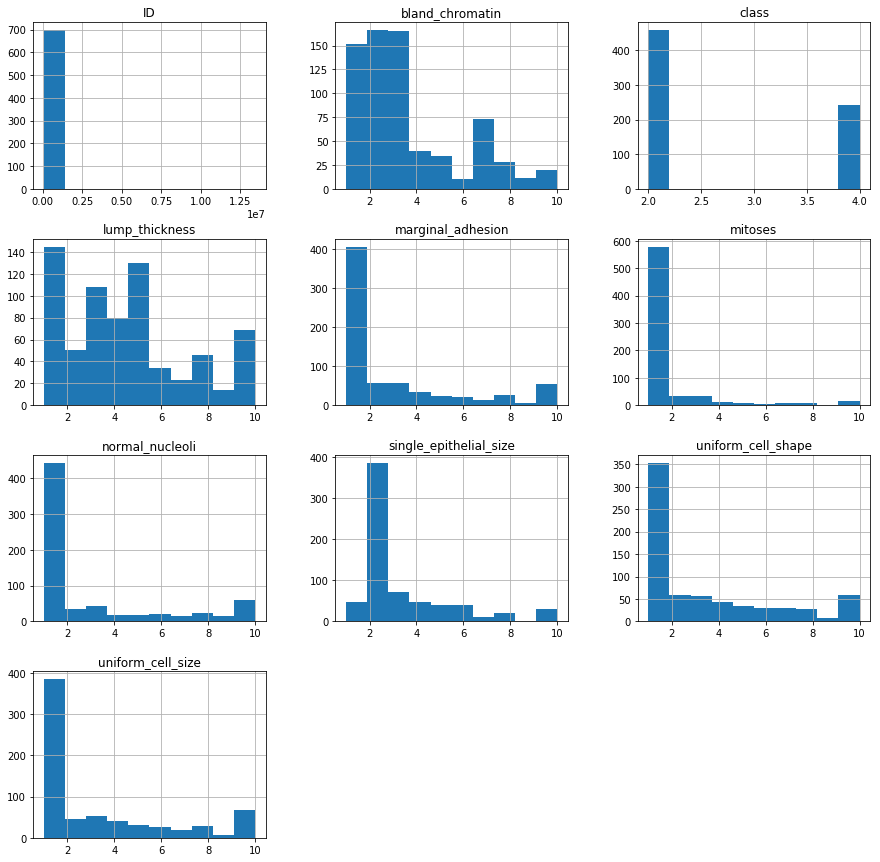

In [93]:
df.hist(figsize=(15,15))
plt.show()

In [94]:
#Use the KNN model to make predictions on dataset
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)

In [77]:
print accuracy_score(y_test, pred)

0.9714285714285714


We end up with an accuracy of 97%.

With classification_report, we are given more detailed results. In fact, it gives us the information about precision, recall and f-1 score. 

In [78]:
print classification_report(y_test, pred)

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        92
           4       0.98      0.94      0.96        48

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

